Сравните количества операций сравнения, используемых при последовательном поиске в несортированном и сортированном списках.

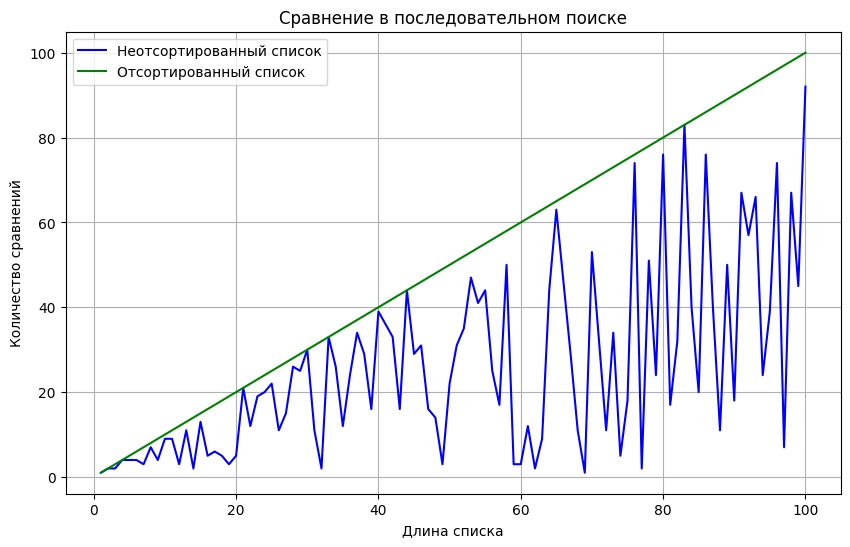

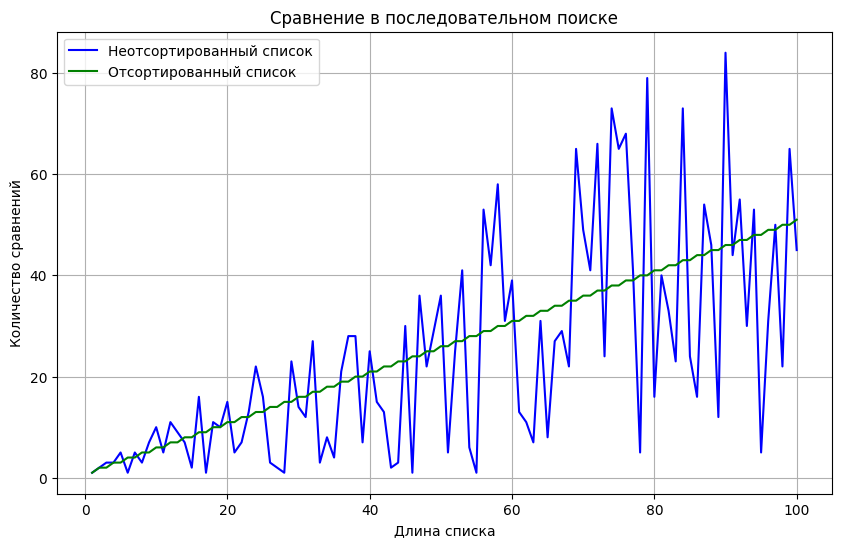

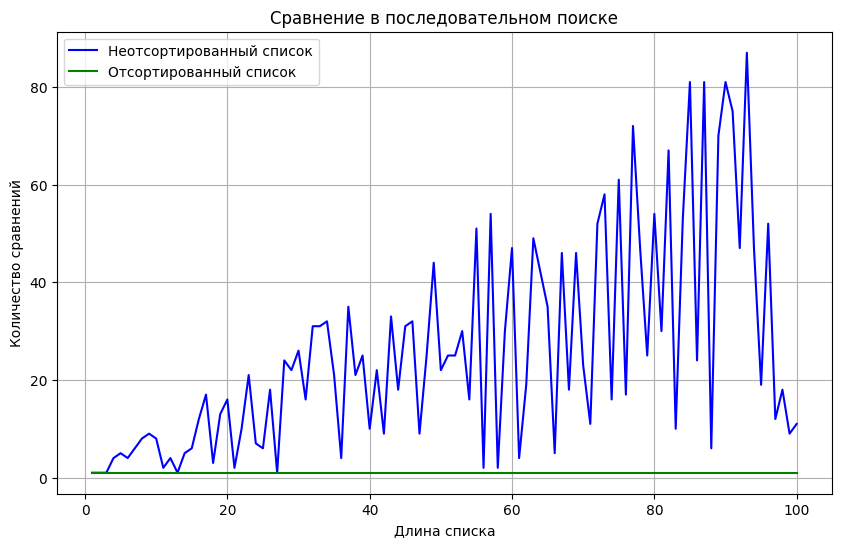

In [80]:
import matplotlib.pyplot as plt
import random

def sequential_search_unsorted(arr, target):
    comparisons = 0
    for item in arr:
        comparisons += 1
        if item == target:
            break
    return comparisons

def sequential_search_sorted(arr, target):
    comparisons = 0
    for item in arr:
        comparisons += 1
        if item == target:
            break
        elif item > target:
            break
    return comparisons

list_lengths = range(1, 101)
unsorted_comparisons = []
sorted_comparisons = []

for length in list_lengths:
    unsorted_list = [i for i in range(length)]
    random.shuffle(unsorted_list)
    sorted_list = sorted(unsorted_list)
    target = length - 1
    unsorted_count = sequential_search_unsorted(unsorted_list, target)
    sorted_count = sequential_search_sorted(sorted_list, target)
    unsorted_comparisons.append(unsorted_count)
    sorted_comparisons.append(sorted_count)

plt.figure(figsize=(10, 6))
plt.plot(list_lengths, unsorted_comparisons, label='Неотсортированный список', color='blue')
plt.plot(list_lengths, sorted_comparisons, label='Отсортированный список', color='green')
plt.xlabel('Длина списка')
plt.ylabel('Количество сравнений')
plt.title('Сравнение в последовательном поиске')
plt.legend()
plt.grid(True)
plt.show()

unsorted_comparisons = []
sorted_comparisons = []

for length in list_lengths:
    unsorted_list = [i for i in range(length)]
    random.shuffle(unsorted_list)
    sorted_list = sorted(unsorted_list)
    target = length // 2
    unsorted_count = sequential_search_unsorted(unsorted_list, target)
    sorted_count = sequential_search_sorted(sorted_list, target)
    unsorted_comparisons.append(unsorted_count)
    sorted_comparisons.append(sorted_count)

plt.figure(figsize=(10, 6))
plt.plot(list_lengths, unsorted_comparisons, label='Неотсортированный список', color='blue')
plt.plot(list_lengths, sorted_comparisons, label='Отсортированный список', color='green')
plt.xlabel('Длина списка')
plt.ylabel('Количество сравнений')
plt.title('Сравнение в последовательном поиске')
plt.legend()
plt.grid(True)
plt.show()

unsorted_comparisons = []
sorted_comparisons = []

for length in list_lengths:
    unsorted_list = [i for i in range(length)]
    random.shuffle(unsorted_list)
    sorted_list = sorted(unsorted_list)
    target = 0
    unsorted_count = sequential_search_unsorted(unsorted_list, target)
    sorted_count = sequential_search_sorted(sorted_list, target)
    unsorted_comparisons.append(unsorted_count)
    sorted_comparisons.append(sorted_count)

plt.figure(figsize=(10, 6))
plt.plot(list_lengths, unsorted_comparisons, label='Неотсортированный список', color='blue')
plt.plot(list_lengths, sorted_comparisons, label='Отсортированный список', color='green')
plt.xlabel('Длина списка')
plt.ylabel('Количество сравнений')
plt.title('Сравнение в последовательном поиске')
plt.legend()
plt.grid(True)
plt.show()

Графически сравните времена выполнения поиска числа в списках разной длины при последовательном поиске в отсортированном списке и при бинарном поиске.

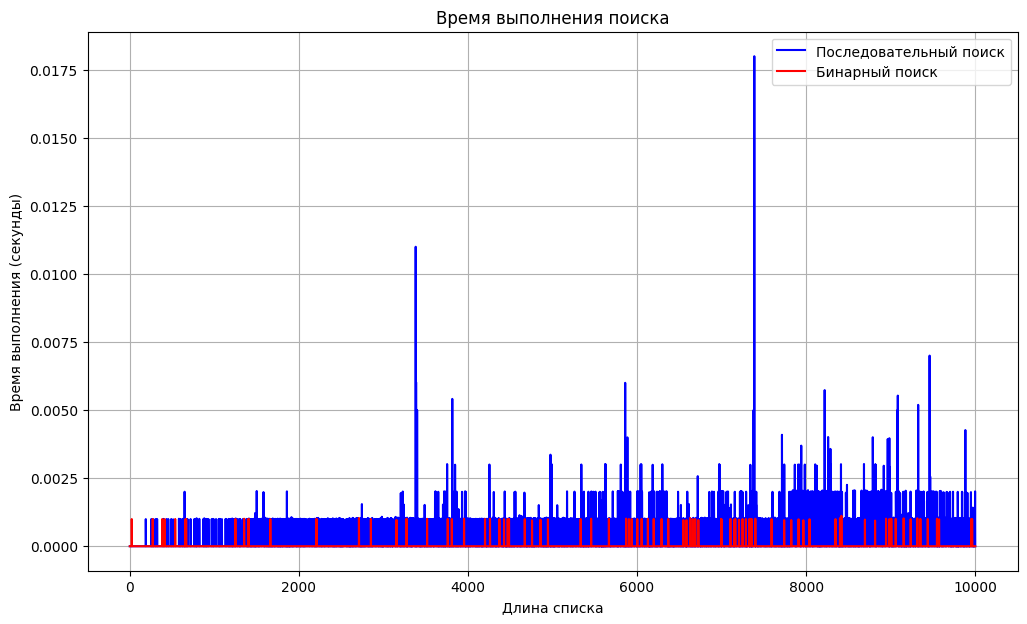

In [74]:
import time
import random

def measure_time(func, arr, target):
    start_time = time.time()
    func(arr, target)
    end_time = time.time()
    return end_time - start_time

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    comparisons = 0

    while left <= right:
        comparisons += 1
        mid = (left + right) // 2
        if arr[mid] == target:
            return comparisons
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return comparisons

list_lengths = range(1, 10001)  
sequential_times = []
binary_times = []

for length in list_lengths:
    arr = [i for i in range(length)]
    target = random.randint(0, length)

    sequential_time = measure_time(sequential_search_sorted, arr, target)
    binary_time = measure_time(binary_search, arr, target)

    sequential_times.append(sequential_time)
    binary_times.append(binary_time)

plt.figure(figsize=(12, 7))
plt.plot(list_lengths, sequential_times, label='Последовательный поиск', color='blue')
plt.plot(list_lengths, binary_times, label='Бинарный поиск', color='red')
plt.xlabel('Длина списка')
plt.ylabel('Время выполнения (секунды)')
plt.title('Время выполнения поиска')
plt.legend()
plt.grid(True)
plt.show()


Определите О-big для бинарного поиска в отсортированном списке.


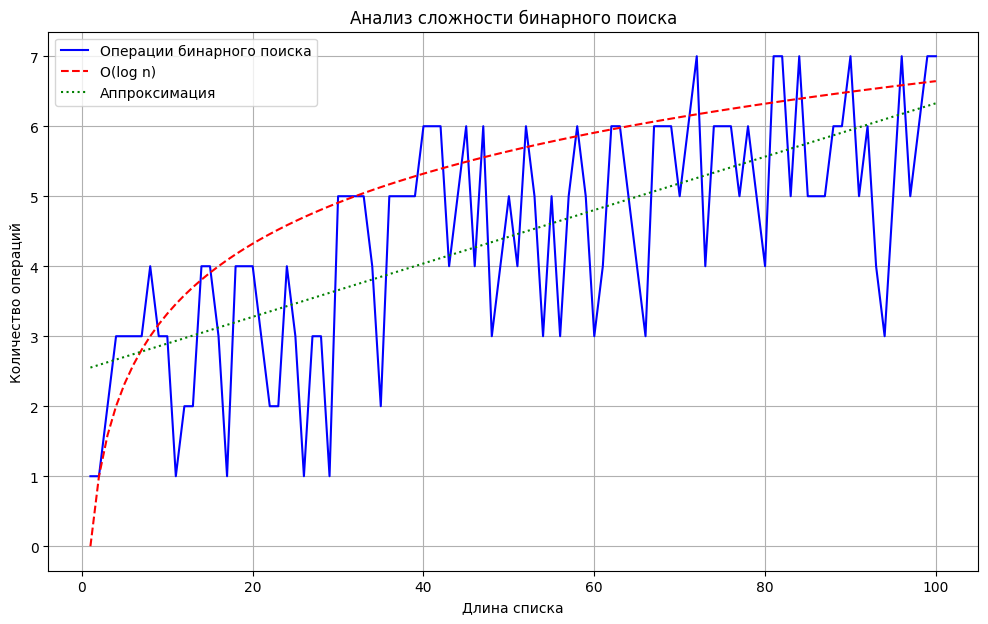

In [84]:
import numpy as np
import math

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    operations = 0
    while left <= right:
        operations += 1
        mid = (left + right) // 2
        if arr[mid] == target:
            return operations
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return operations

list_lengths = range(1, 101)
binary_operations = []
logn = [math.log(n, 2) if n > 0 else 0 for n in list_lengths]

for length in list_lengths:
    arr = [i for i in range(length)]
    target = random.randint(0, length - 1)
    operations = binary_search(arr, target)
    binary_operations.append(operations)

coefficients_log = np.polyfit(list_lengths, binary_operations, 1)
log_fit_data = np.polyval(coefficients_log, list_lengths)

plt.figure(figsize=(12, 7))
plt.plot(list_lengths, binary_operations, label='Операции бинарного поиска', color='blue')
plt.plot(list_lengths, logn, label='O(log n)', linestyle='dashed', color='red')
plt.plot(list_lengths, log_fit_data, label='Аппроксимация', linestyle='dotted', color='green')
plt.xlabel('Длина списка')
plt.ylabel('Количество операций')
plt.title('Анализ сложности бинарного поиска')
plt.legend()
plt.grid(True)
plt.show()

Опишите алгоритм, достоинства и недостатки сортировки вставками

Определите количество операций и О-big для сортировки вставками

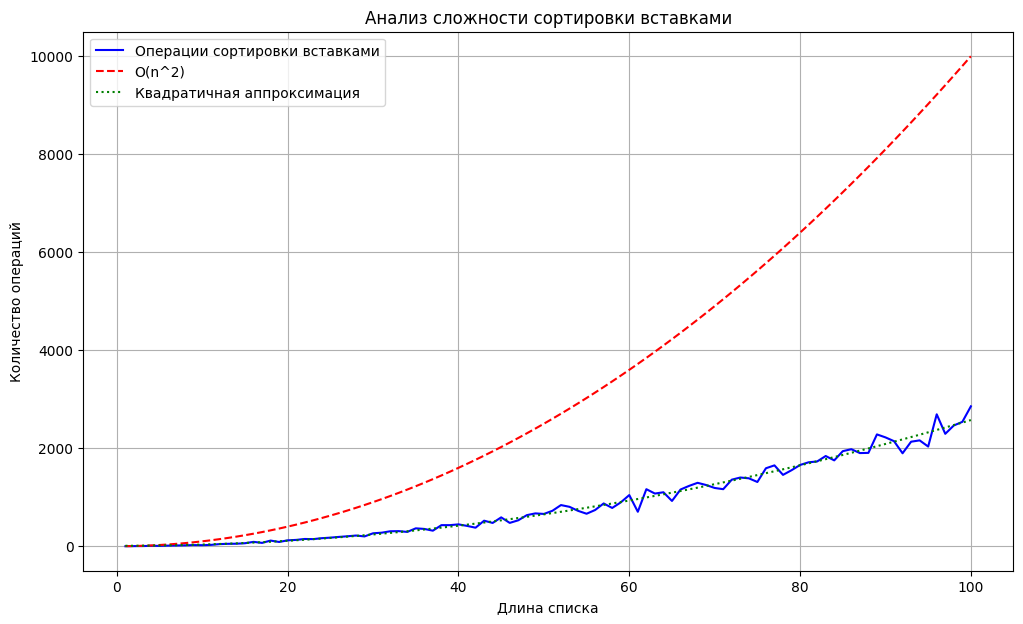

In [82]:
import numpy as np

def insertion_sort(arr):
    operations = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
            operations += 1
        arr[j + 1] = key
        operations += 1
    return operations

list_lengths = range(1, 101)
insertion_operations = []
n_squared = [length ** 2 for length in list_lengths]

for length in list_lengths:
    arr = [i for i in range(length)]
    random.shuffle(arr)
    operations = insertion_sort(arr)
    insertion_operations.append(operations)

coefficients = np.polyfit(list_lengths, insertion_operations, 2)
quadratic_fit_data = np.polyval(coefficients, list_lengths)

plt.figure(figsize=(12, 7))
plt.plot(list_lengths, insertion_operations, label='Операции сортировки вставками', color='blue')
plt.plot(list_lengths, n_squared, label='O(n^2)', linestyle='dashed', color='red')
plt.plot(list_lengths, quadratic_fit_data, label='Квадратичная аппроксимация', linestyle='dotted', color='green')
plt.xlabel('Длина списка')
plt.ylabel('Количество операций')
plt.title('Анализ сложности сортировки вставками')
plt.legend()
plt.grid(True)
plt.show()

Графически сравните время сортировкой вставками и сортировка слиянием

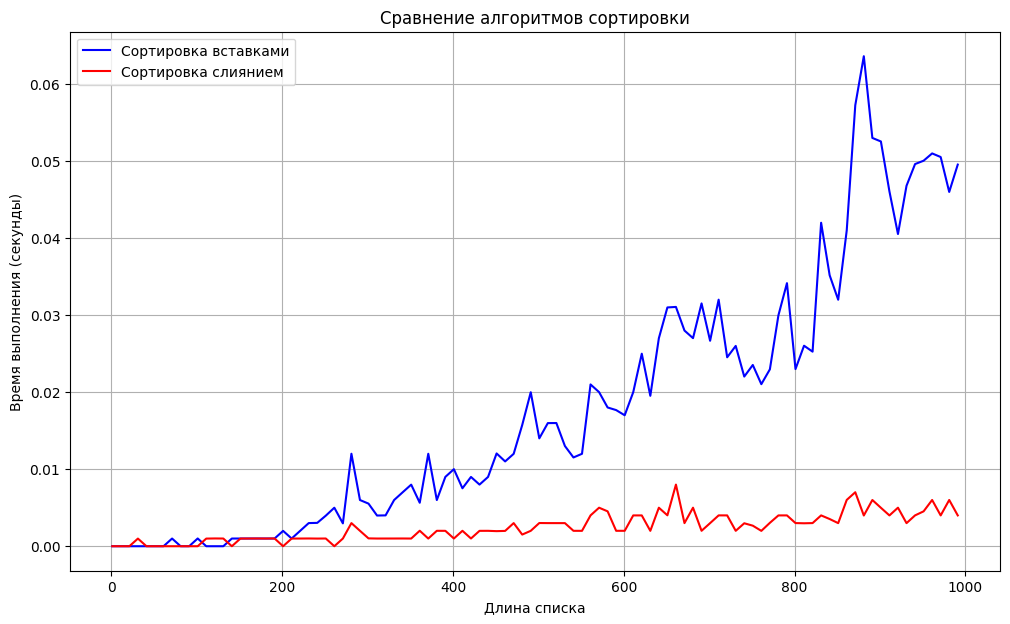

In [78]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def insertion_sort_for_timing(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

list_lengths = range(1, 1001, 10)
insertion_times = []
merge_times = []

for length in list_lengths:
    arr = [random.randint(0, 1000) for _ in range(length)]
    
    arr_copy = arr.copy()
    start_time = time.time()
    insertion_sort_for_timing(arr_copy)
    insertion_times.append(time.time() - start_time)

    arr_copy = arr.copy()
    start_time = time.time()
    merge_sort(arr_copy)
    merge_times.append(time.time() - start_time)

plt.figure(figsize=(12, 7))
plt.plot(list_lengths, insertion_times, label='Сортировка вставками', color='blue')
plt.plot(list_lengths, merge_times, label='Сортировка слиянием', color='red')
plt.xlabel('Длина списка')
plt.ylabel('Время выполнения (секунды)')
plt.title('Сравнение алгоритмов сортировки')
plt.legend()
plt.grid(True)
plt.show()